In [802]:
# Fetch the Covid-19 data for Germany and Poland from the "Our World in Data" website
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Load the Covid-19 data for Poland and Germany from a CSV file
covid_data = pd.read_csv('data.csv', sep=',', decimal=',', encoding='windows-1251')

# p_covid = covid_data[covid_data['countriesAndTerritories'] == 'Poland']
# g_covid = covid_data[covid_data['countriesAndTerritories'] == 'Germany']
poland_covid = covid_data[covid_data['countriesAndTerritories'] == 'Poland']
germany_covid = covid_data[covid_data['countriesAndTerritories'] == 'Germany']
poland_covid['dateRep'] = pd.to_datetime(p_covid['dateRep'], format='%d/%m/%Y')
germany_covid['dateRep'] = pd.to_datetime(g_covid['dateRep'], format='%d/%m/%Y')



/var/folders/pl/17z0ddz94xs40jk4spqp7bwc0000gn/T/ipykernel_63346/3835345835.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poland_covid['dateRep'] = pd.to_datetime(p_covid['dateRep'], format='%d/%m/%Y')
/var/folders/pl/17z0ddz94xs40jk4spqp7bwc0000gn/T/ipykernel_63346/3835345835.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_covid['dateRep'] = pd.to_datetime(g_covid['dateRep'], format='%d/%m/%Y')


In [803]:
covid_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28729 entries, 0 to 28728
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  28729 non-null  object 
 1   day                      28729 non-null  int64  
 2   month                    28729 non-null  int64  
 3   year                     28729 non-null  int64  
 4   cases                    28636 non-null  float64
 5   deaths                   28437 non-null  float64
 6   countriesAndTerritories  28729 non-null  object 
 7   geoId                    28729 non-null  object 
 8   countryterritoryCode     28729 non-null  object 
 9   popData2020              28729 non-null  int64  
 10  continentExp             28729 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.4+ MB


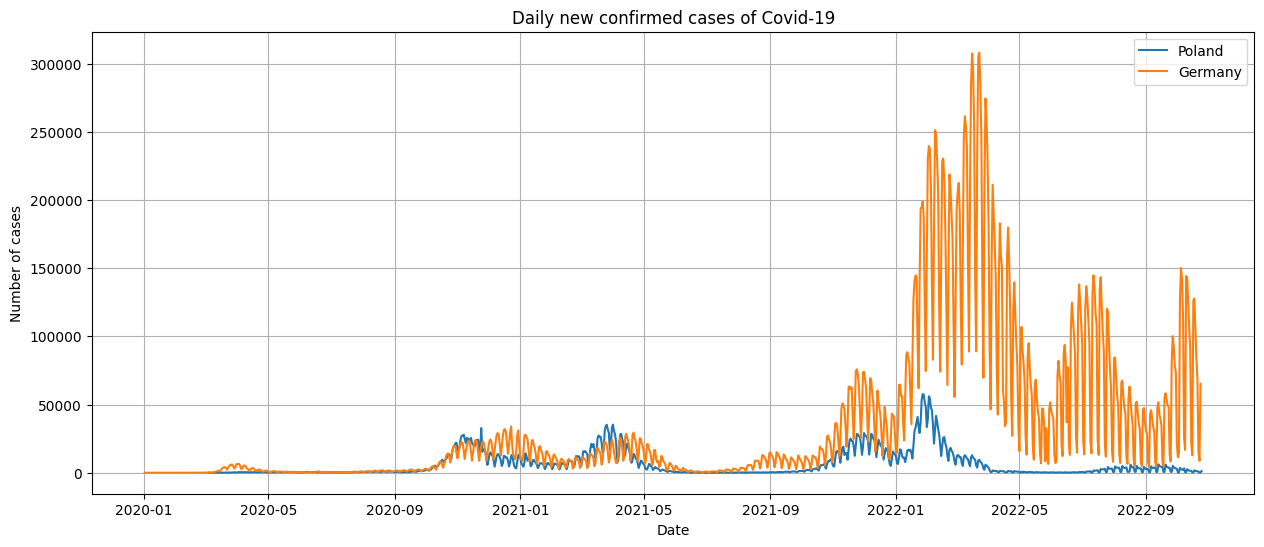

In [804]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot the daily new confirmed cases for Poland and Germany
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(poland_covid['dateRep'], poland_covid['cases'], label='Poland')
ax.plot(germany_covid['dateRep'], germany_covid['cases'], label='Germany')
ax.set_title('Daily new confirmed cases of Covid-19')
locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Date')
ax.set_ylabel('Number of cases')
ax.legend()
ax.grid()
plt.show()


In [805]:
# Find the date with the maximum number of cases for Poland and Germany
poland_max_cases_date = poland_covid.loc[poland_covid['cases'].idxmax(), 'dateRep']
germany_max_cases_date = germany_covid.loc[germany_covid['cases'].idxmax(), 'dateRep']

# Print the results
print(f"Date with the maximum number of cases in Poland: {poland_max_cases_date.date()}")
print(f"Date with the maximum number of cases in Germany: {germany_max_cases_date.date()}")

Date with the maximum number of cases in Poland: 2022-01-27
Date with the maximum number of cases in Germany: 2022-03-23


In [806]:
poland_covid_c = poland_covid['cases']
poland_covid_c.describe()



count      966.000000
mean      6407.414079
std       9458.639495
min          0.000000
25%        339.250000
50%       1472.500000
75%       9331.500000
max      57659.000000
Name: cases, dtype: float64

In [807]:
germany_covid_c = germany_covid['cases']
germany_covid_c.describe()

count       992.000000
mean      35572.268145
std       56682.109086
min           1.000000
25%        2088.000000
50%       11359.000000
75%       41831.750000
max      307914.000000
Name: cases, dtype: float64

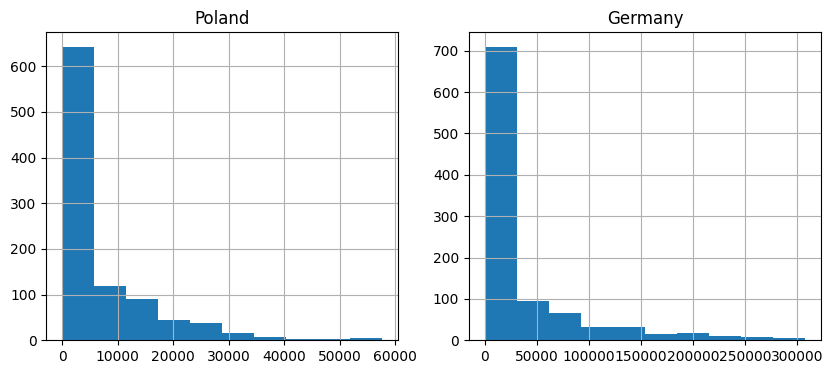

In [808]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
poland_covid_c.hist(ax=ax1)
ax1.set_title('Poland')
germany_covid_c.hist(ax=ax2)
ax2.set_title('Germany')
plt.show()

In [809]:
def plot_moving_average(series, n):
    rolling_mean = series['cases'].rolling(window=n).mean()
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of cases')
    ax.plot(series['dateRep'], rolling_mean, c='orange', label='Rolling mean trend')
    ax.plot(series['dateRep'], series['cases'], label='Actual values')
    ax.legend(loc='upper left')
    ax.grid(True)
    ax.legend()
    ax.grid()
    plt.show()

Poland: 


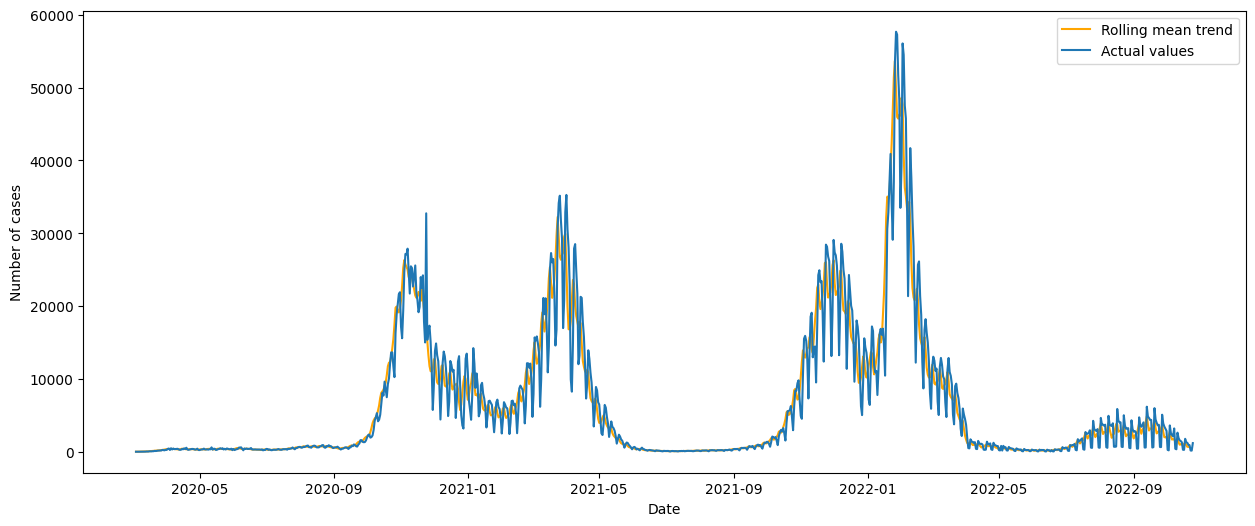

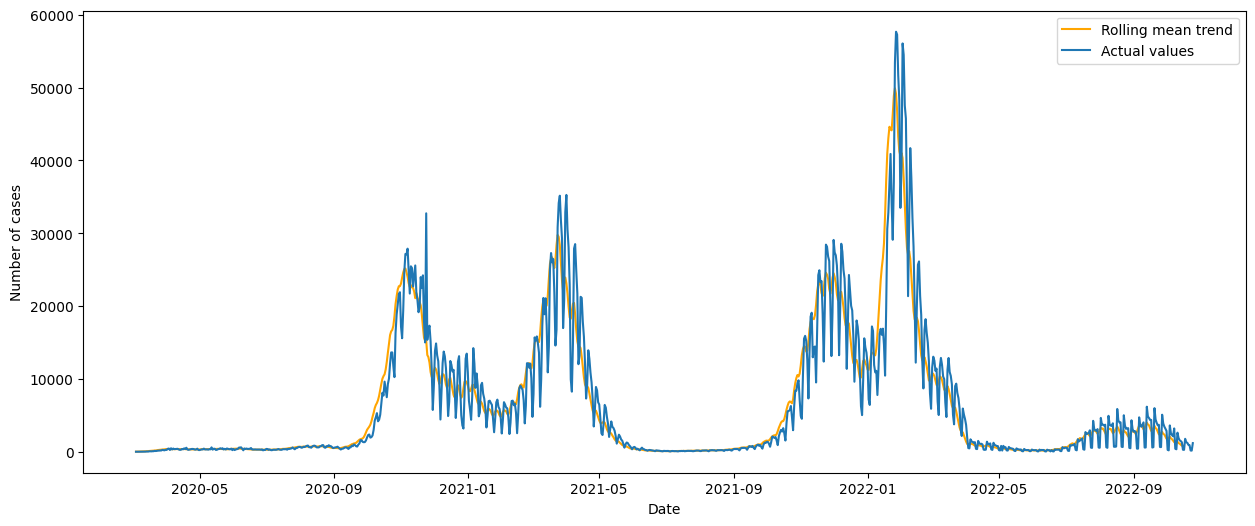

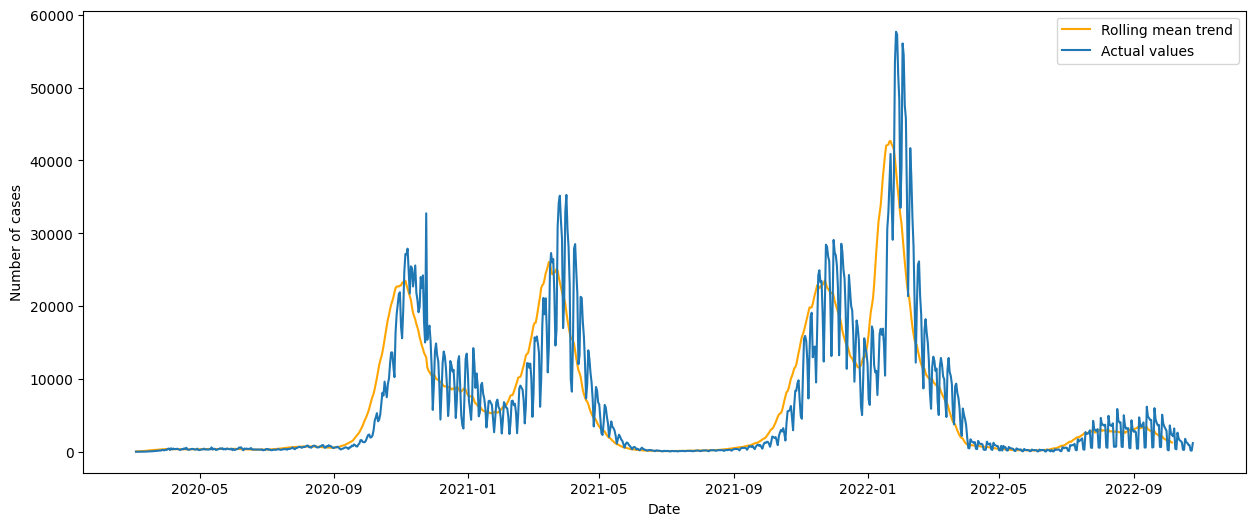

In [810]:

print('Poland: ')
plot_moving_average(poland_covid, 5)
plot_moving_average(poland_covid, 10)
plot_moving_average(poland_covid, 20)



Germany: 


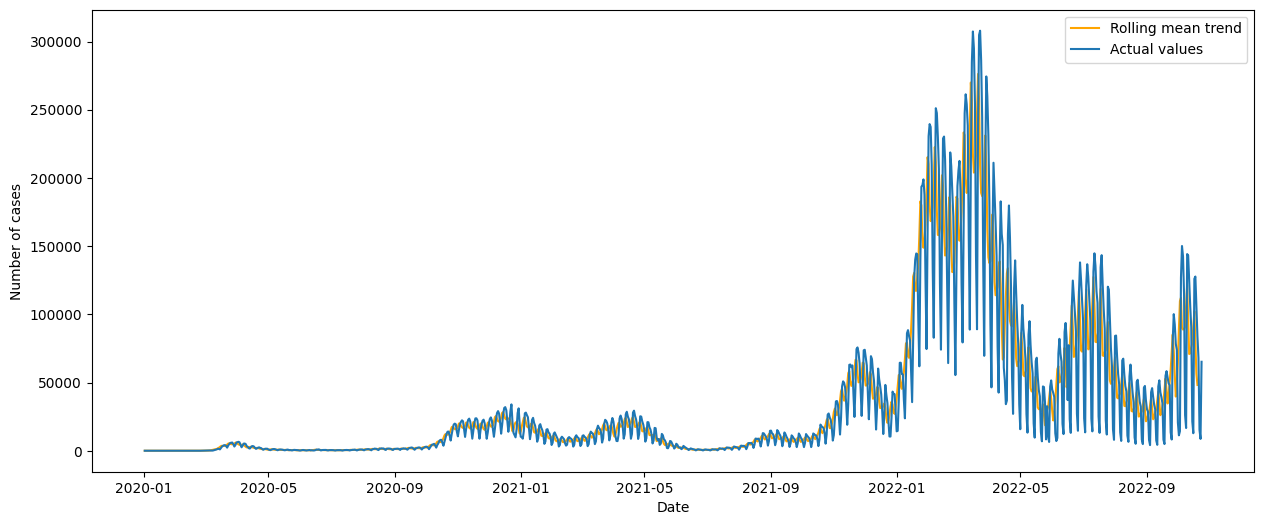

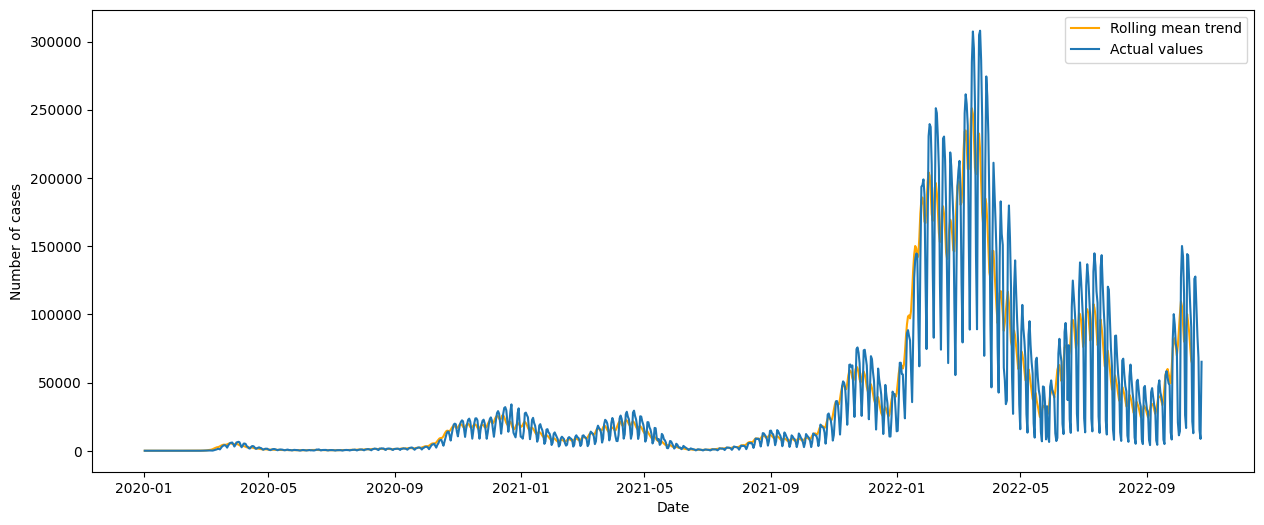

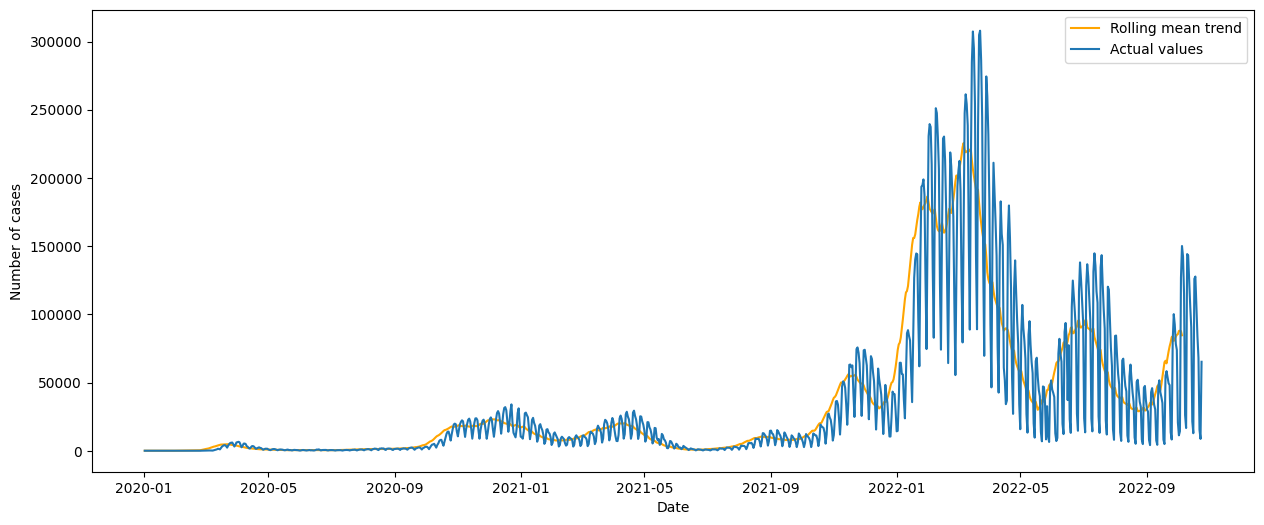

In [811]:
print('Germany: ')
plot_moving_average(germany_covid, 5)
plot_moving_average(germany_covid, 10)
plot_moving_average(germany_covid, 20)

Poland: 


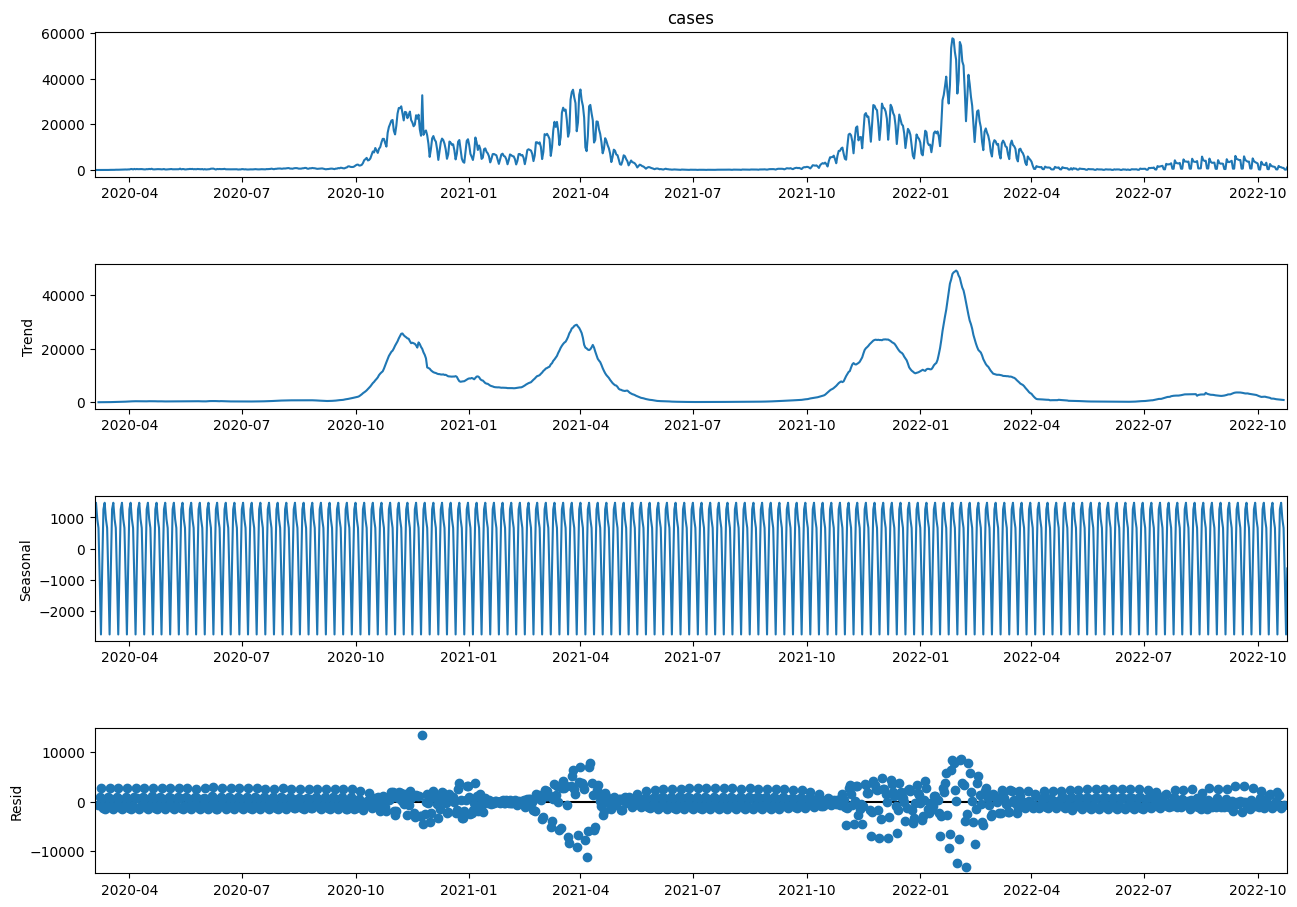

In [812]:
poland_covid_n = poland_covid[['dateRep','cases']]
poland_covid_n = poland_covid_n.dropna()
poland_covid_n = poland_covid_n.sort_values(by='dateRep')
decomposition = smt.seasonal_decompose(poland_covid_n.set_index('dateRep')['cases'])

# Plot the results
print('Poland: ')
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()




/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


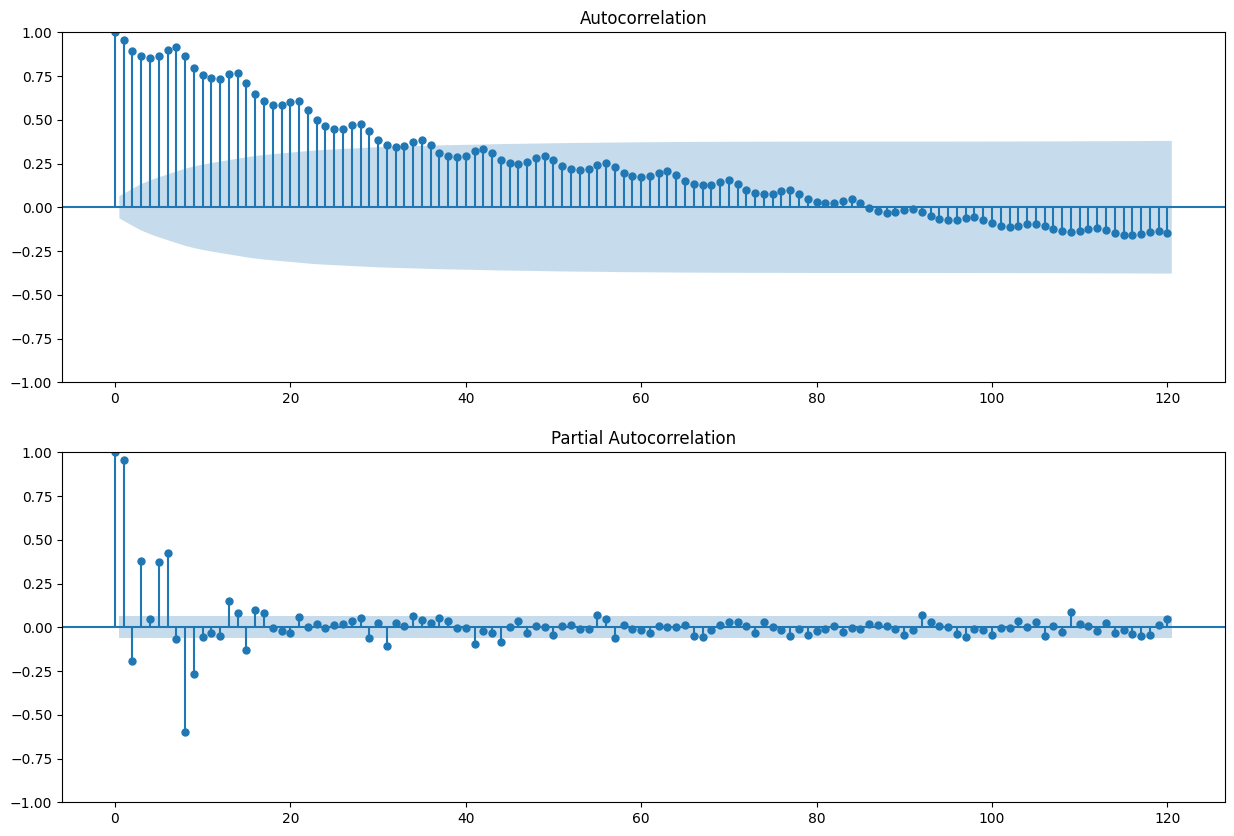

In [813]:
poland_covid_n = poland_covid[['dateRep', 'cases']]
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(poland_covid_n['cases'], ax=ax[0], lags=120)
ax[1] = plot_pacf(poland_covid_n['cases'], ax=ax[1], lags=120)
plt.show()


In [829]:
def dickey_fuller_test(series):
    test = smt.adfuller(series, autolag='AIC')
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']: 
        print('There are unit roots, the series is not stationary.')
    else:
        print('There are no unit roots, the series is stationary')

dickey_fuller_test(poland_covid_n['cases'])
print('\n')
dickey_fuller_test(germany_covid['cases'])

adf:  -3.389276145156373
p-value:  0.011329924879352258
Critical values:  {'1%': -3.43725945868569, '5%': -2.8645903751292536, '10%': -2.5683941938438886}
There are no unit roots, the series is stationary


adf:  -1.9916387092353385
p-value:  0.29025122490318106
Critical values:  {'1%': -3.437116468121892, '5%': -2.864527318984441, '10%': -2.5683606077036214}
There are unit roots, the series is not stationary.


In [815]:
# Fetch the exchange rate data for hryvnia/dollar and hryvnia/euro from the National Bank of Ukraine website
df = pd.read_csv('uah-usd.csv', sep=',', decimal=',', encoding='windows-1251')

# Convert data types to the appropriate types
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df[['Open', 'High', 'Low', 'Close', 'Adj Close']] = df[['Open', 'High', 'Low', 'Close', 'Adj Close']].astype(float)

# Sort the dataframe by date
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)
df.index.freq = pd.date_range(start=df.index[0], end=df.index[-1], periods=len(df)).inferred_freq




/var/folders/pl/17z0ddz94xs40jk4spqp7bwc0000gn/T/ipykernel_63346/3630198260.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['Open', 'High', 'Low']].plot(ax=ax, subplots=True)


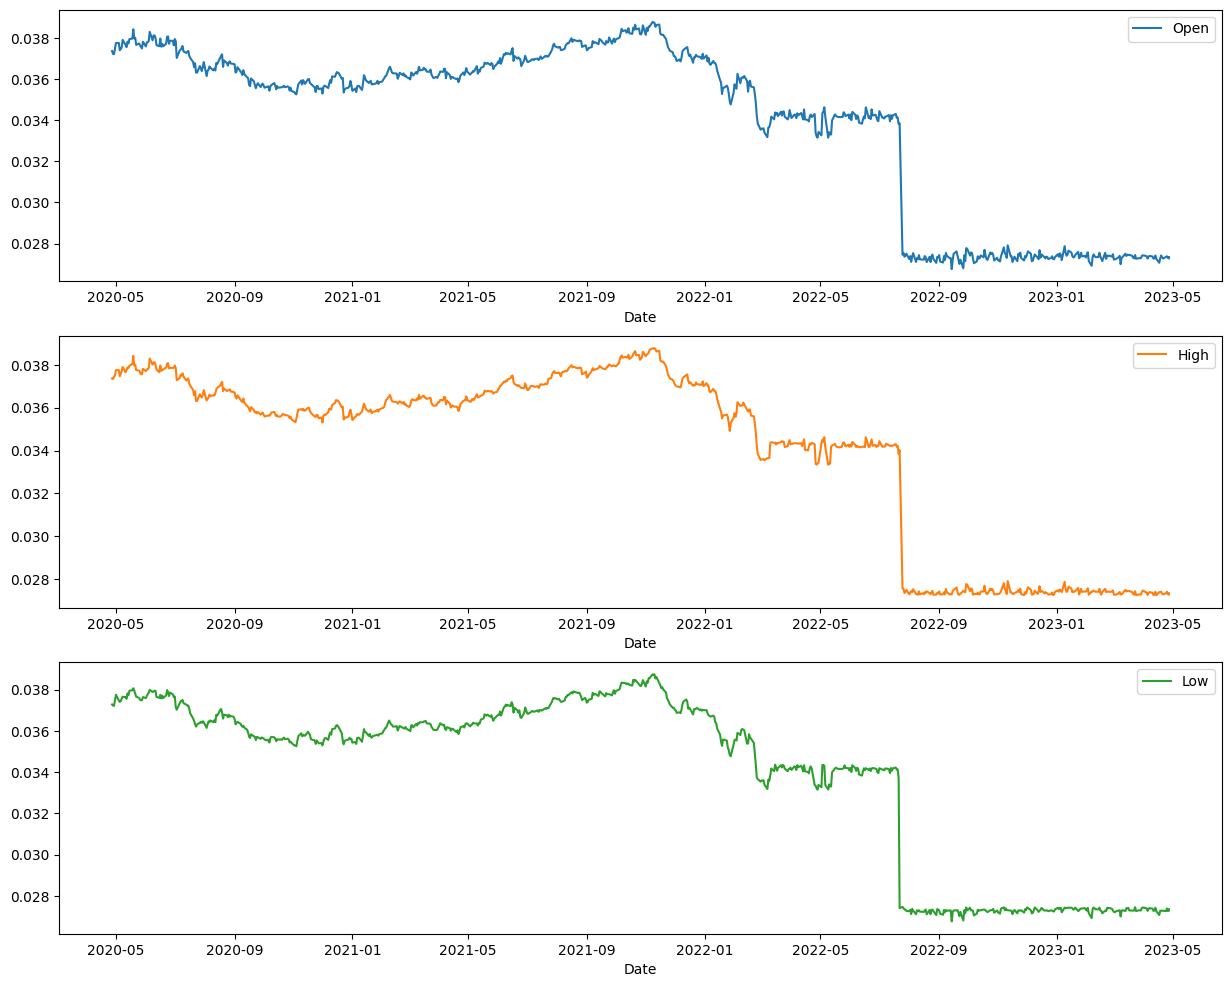

In [816]:
fig, ax = plt.subplots(figsize=(15, 12))

df[['Open', 'High', 'Low']].plot(ax=ax, subplots=True)
ax.grid()
plt.show()


In [817]:
def moving_average(series, n):
    rolling_mean = series.rolling(window=n).mean()
    plt.figure(figsize=(15, 5))
    plt.plot(rolling_mean, c='orange', label='Rolling mean trend')
    plt.plot(series[n:], label='Actual values')
    plt.legend(loc='upper left')
    plt.grid(True)

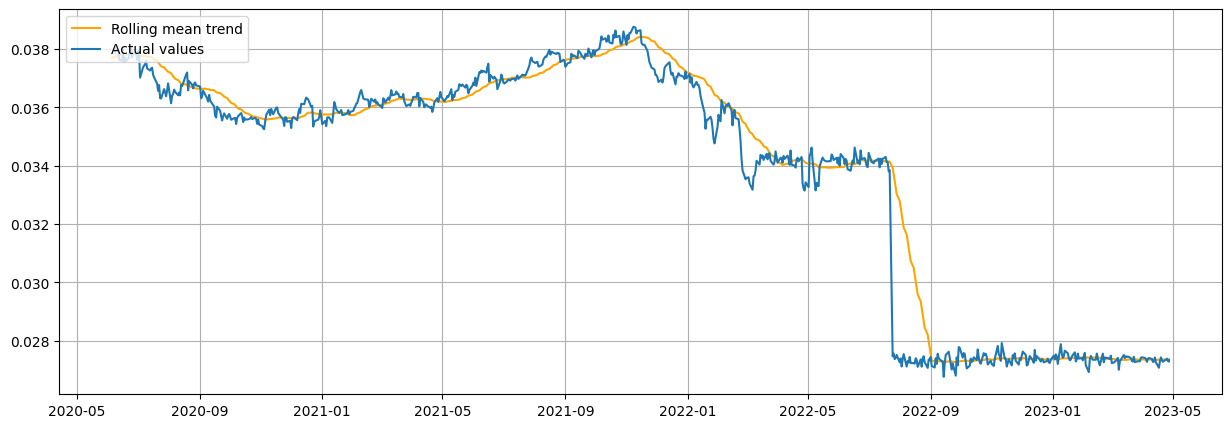

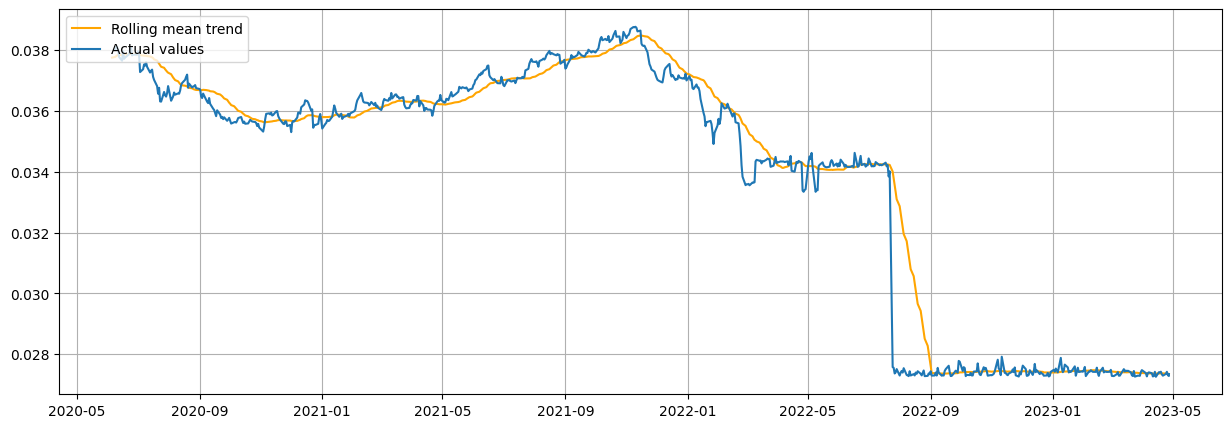

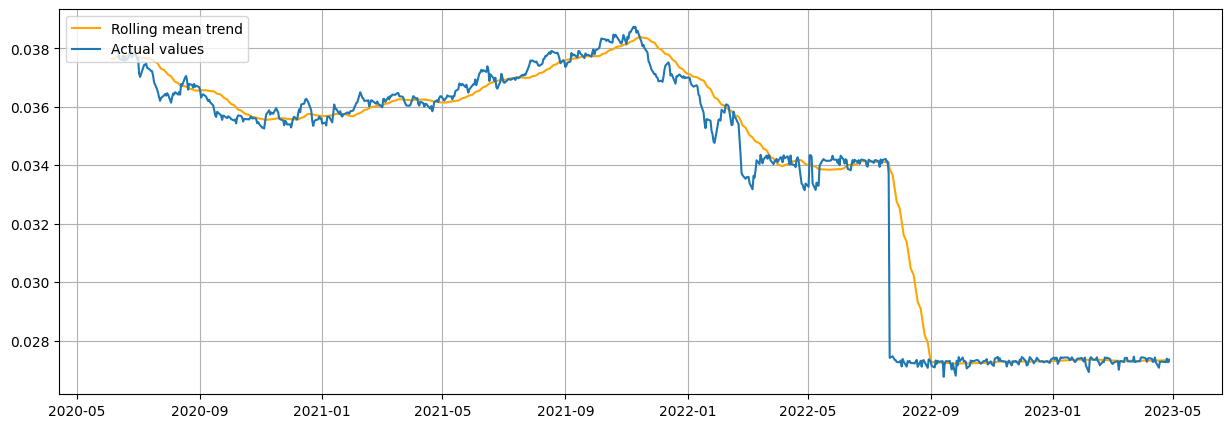

In [818]:
moving_average(df['Open'], 30)
moving_average(df['High'], 30)
moving_average(df['Low'], 30)

In [830]:
dickey_fuller_test(df['Open'])

adf:  -0.4096657335338527
p-value:  0.9084723942617245
Critical values:  {'1%': -3.4387291412780177, '5%': -2.8652383048736056, '10%': -2.568739332674375}
There are unit roots, the series is not stationary.


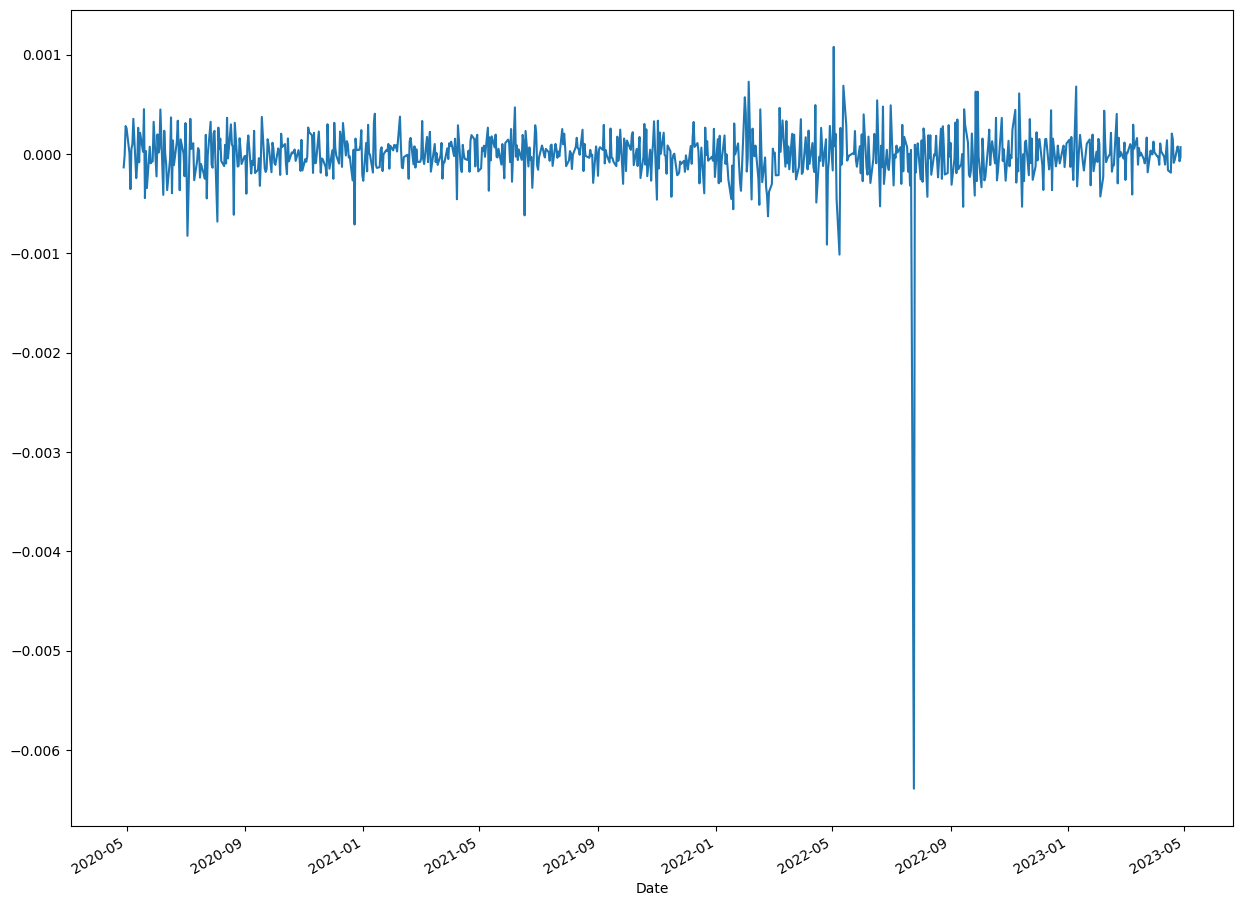

In [820]:
currencies_price_df_diff = df['Open'].diff(periods=1).dropna()
fig, ax = plt.subplots(figsize=(15, 12))

currencies_price_df_diff.plot(ax=ax)

plt.show()

In [831]:
dickey_fuller_test(currencies_price_df_diff)

adf:  -31.798977358781638
p-value:  0.0
Critical values:  {'1%': -3.4387291412780177, '5%': -2.8652383048736056, '10%': -2.568739332674375}
There are no unit roots, the series is stationary


/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


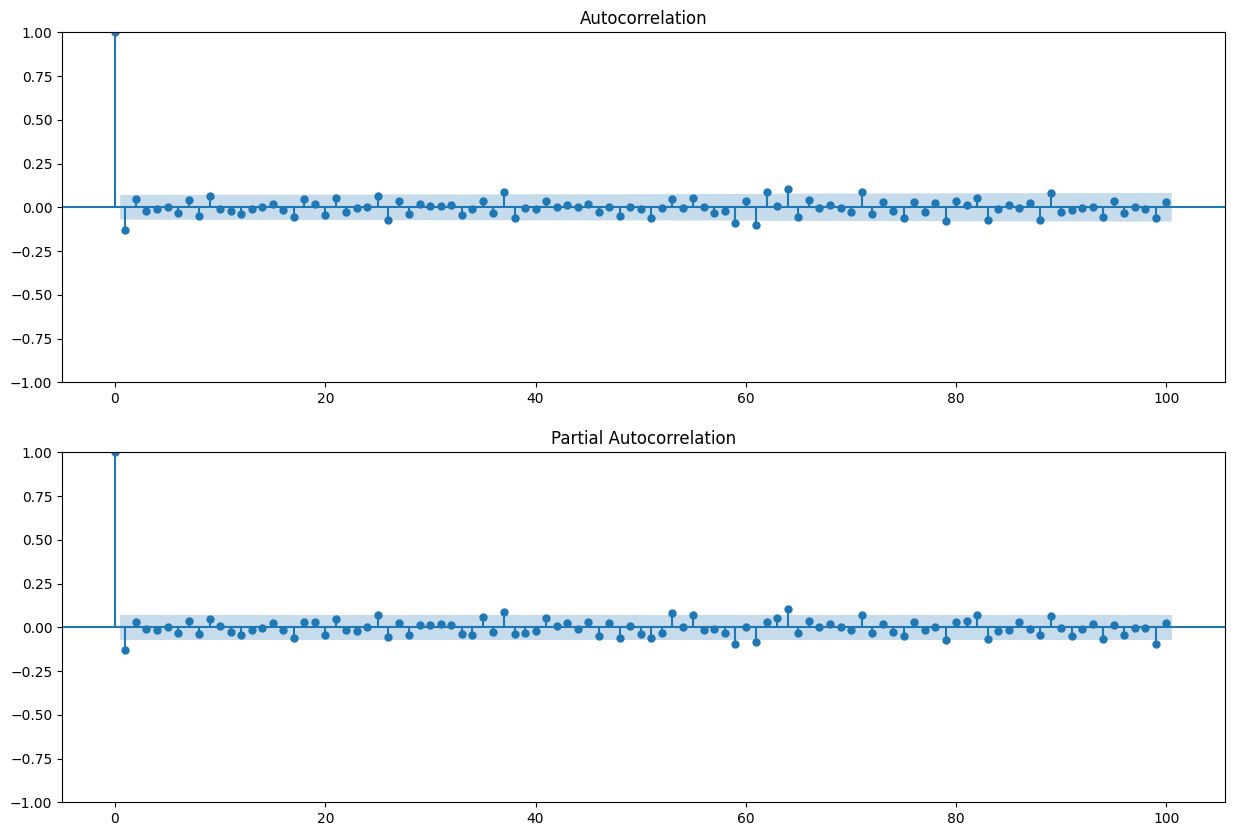

In [822]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(currencies_price_df_diff, ax=ax[0], lags=100)
ax[1] = plot_pacf(currencies_price_df_diff, ax=ax[1], lags=100)

In [823]:
train_data = df['Open'][:-7]
model = smt.ARIMA(train_data, order=(1, 1, 1)).fit()

/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [824]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  778
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5169.218
Date:                Fri, 28 Apr 2023   AIC                         -10332.435
Time:                        00:28:09   BIC                         -10318.469
Sample:                    04-27-2020   HQIC                        -10327.063
                         - 04-19-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3888      0.010    -37.585      0.000      -0.409      -0.369
ma.L1          0.2669      0.010     26.154      0.000       0.247       0.287
sigma2       9.71e-08   4.74e-10    204.684      0.000    9.62e-08     9.8e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1589552.96
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                           -10.92
Prob(H) (two-sided):                  0.00   Kurtosis:                       223.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.19e+16. Standard errors may be unstable.
"""

In [825]:
pred = model.predict(df['Open'].index[-7], df['Open'].index[-1])
test_data = currencies_price_df_diff[-7:]

In [828]:


forecasts = model.forecast(7)
forecasts

2023-04-20    0.027413
2023-04-21    0.027418
2023-04-24    0.027416
2023-04-25    0.027417
2023-04-26    0.027416
2023-04-27    0.027416
2023-04-28    0.027416
Freq: B, Name: predicted_mean, dtype: float64